## Preparing A Benchmark Model

Having performed a preliminary analysis of the data, we move onto preparing a benchmark model. First, we will do some analysis of the target column. Based upon this analysis we will think about what the best model for a benchmark might be. 


#### load the dataset using `read.csv()`

Load the csv file `titanic-updated.csv` into a dataframe called `titanic`.

In [15]:
titanic = read.csv("titanic-updated.csv", header=T, row.names='X')

In [16]:
head(titanic)

Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,3,male,22,1,0,A/5 21171,7.2500,,S
1,1,female,38,1,0,PC 17599,71.2833,C85,C
1,3,female,26,0,0,STON/O2. 3101282,7.9250,,S
1,1,female,35,1,0,113803,53.1000,C123,S
0,3,male,35,0,0,373450,8.0500,,S
0,3,male,NA,0,0,330877,8.4583,,Q


In [17]:
stopifnot(dim(titanic) == c(891,10))

## Contingency Tables

We will make use of the R `table()` function to study the target column. This function builds a **contingency table** of the counts combinations of factor levels. Of course if only a Single column is passed to the function, it will just return a simple count.

#### define a contingency table of `titanic$survived`

Define a table called `table_survival` which is a contingency table for `titanic$survived`.

In [18]:
table_survival = table(titanic$Survived)
table_survival


  0   1 
549 342 

From the result returns, we can see that the  survival status is stored as either a 0, corresponding to "did not survive", or a 1 corresponding to "survived". We can **use the helper function `prop.table()`** (_proportion table_) **to express the results of a contingency table as fractions**, that is _proportionately_. 

Here, we can see that approximately $0.6$ of the passengers did not survive. One thing we should immediately take note of is that our _target column is not evenly distributed_. An **evenly distributed** target column would have the exact same number of each possible outcome (50% lived, 50% died; or 33.3% small, 33.3% medium, 33.3% large). As we grow in our data science practice we will learn more about dealing with an evenly distributed target. For now it is sufficient to simply take note of this fact.

#### define a proportion table of `titanic$survived`

Define a table called `prop_table_survival` which is a contingency table for `titanic$survived`.

In [19]:
prop_table_survival = prop.table(table(titanic$Survived))
prop_table_survival


        0         1 
0.6161616 0.3838384 

Below, we use a histogram to show once more that the target is not evenly distributed. By default, the `hist()` function simply shows the counts for each measured value.

#### display a histogram of `titanic$Survived`

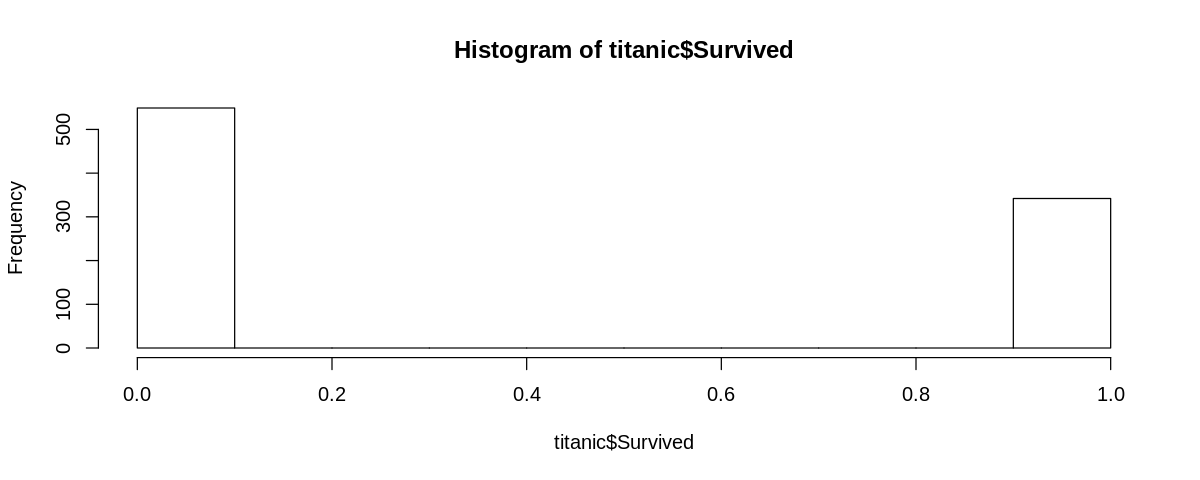

In [20]:
library(repr)
options(repr.plot.width=10, repr.plot.height=4)

hist(titanic$Survived)

### A Naïve Guess

We will use a naive guess based on the most common class as a benchmark. 61.6% of passengers did not survive. We will guess for our benchmark that there were no survivors. Note that we have done very little work and already have a better than 50-50 chance of getting a correct answer simply by guessing that no one survived. This is one consideration (issue) for an **unevenly distributed target. Simply measuring accuracy may not give us a realistic sense of how well our model is doing**. This is one reason why preparing a benchmark is so important. Had we not prepared a benchmark we might think that a 55% accuracy is decent because it's better than the simple 50-50. This **benchmark gives us a sense of what we need to do _better than_** in order to prepare a model that adds value to the situation.

#### store the number of passengers

Store the number of passengers as the variable `number_of_passengers`.

In [21]:
number_of_passengers <- length(titanic$Survived)

In [22]:
### HIDDEN TEST

#### Create a vector called `no_survivors` that is a list of predictions that no one survived.

To create such a vector using R, we will use the **replicate `rep()` function**. This function takes a value and replicates it a given number of times.

In [23]:
no_survivors <- rep(0, number_of_passengers)
str(no_survivors)
no_survivors

 num [1:891] 0 0 0 0 0 0 0 0 0 0 ...


[1] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 [38] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 [75] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
[112] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
[149] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
[186] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
[223] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
[260] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
[297] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
[334] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
[371] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
[408] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
[445] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
[482] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
[519] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
[556] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
[593] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
[630] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
[667] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
[704] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
[741] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
[778] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
[815] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
[852] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
[889] 0 0 0

#### FREE RESPONSE

Describe in words the vector `no_survivors`.

Every value is 0. This vector is our naive prediction for any given passenger, that passenger(i) did not survive. It's is "naive" bc we pretend we know nothing (or actually do know nothing) about the true output. Because the true output is unevenly distributed (61.6% of passengers did not survive), our guess is right 61.6% of the time. Our naive guess actually outperforms the 50-50 odds that would hold if the output was evenly distributed. 

Once we have prepared this naïve guess, we can use the `accuracy` function we defined earlier to assess our benchmark as a vector of predictions.

#### define accuracy metric

Write a function called  `accuracy`. This function should takes two vectors as argument: 

1. a vector of actual values
1. a vector of predicted values 

The function should do two things:

1. it should use `verify_length` to make sure that the vectors have the same length.
1. it computes the accuracy of a prediction vector where accuracy is defined by

$$\text{accuracy} = \sum \left(\text{class}_{actual} = \text{class}_{predicted}\right)$$




In [24]:
verify_length <- function (v1, v2 )
{
    if (length(v1) != length(v2)) 
    {
        stop('length of vectors do not match') 
    }
}

accuracy <- function (actual, predicted) 
{
    verify_length(actual, predicted)
    
    # Compute the accuracy of the `predictor` vector using `sum`
    n = length(actual)
    
    return (sum(actual == predicted) / n)   
}

In [25]:
accuracy(titanic$Survived, no_survivors)
stopifnot(round(accuracy(titanic$Survived, no_survivors), 2) == 0.62)

[1] 0.6161616

If implemented correctly, you should see an accuracy of $0.\bar{61}$.

### Benchmark Model

This solution, that is simply guessing that no on survived should be taken as a benchmark model. Any subsequent model that we test on this task should achieve an accuracy higher than this or it should be immediately rejected.